# Mandatory Assignment 3


## US Jobs and Import Competition from China 
Af: Mathias Nikolaisen(dnt357), Oliver Mattthews(jvc975) & Clara Maj Folkmann(djz279)

### Problem 1

In [1]:
#1.1
import pandas as pd


data_path = 'A3_X2017S_MetricsI.dta'
df = pd.read_stata(data_path)

# Beregn beskrivende statistik for hver periode
summary_stats_period_0 = df[df['t2'] == 0][['dsL', 'dIPWusch', 'college', 'routine', 'dIPWusmx', 'foreignborn', 'dIPWotch', 'dIPWukch', 'dIPWotmx']].describe()
summary_stats_period_1 = df[df['t2'] == 1][['dsL', 'dIPWusch', 'college', 'routine', 'dIPWusmx', 'foreignborn', 'dIPWotch', 'dIPWukch', 'dIPWotmx']].describe()

# Udskriv summariske statistikker for begge perioder
print("1990-2000 (t2 = 0):")
print(summary_stats_period_0)

print("2000-2007 (t2 = 1):")
print(summary_stats_period_1)

1990-2000 (t2 = 0):
              dsL    dIPWusch     college     routine    dIPWusmx  \
count  662.000000  662.000000  662.000000  662.000000  662.000000   
mean    -0.957021    1.186600   42.097832   28.288479    1.385140   
std      2.240247    1.838066    8.530094    3.383778    1.745306   
min    -19.167072   -0.075351   19.943975   19.991844   -0.472184   
25%     -2.084500    0.248525   35.936215   25.965810    0.200659   
50%     -0.685493    0.744347   42.515060   28.257560    0.819297   
75%      0.379791    1.426852   47.567284   30.532486    1.908813   
max      5.664484   25.405270   62.898552   37.747578   12.595978   

       foreignborn    dIPWotch    dIPWukch    dIPWotmx  
count   662.000000  662.000000  662.000000  662.000000  
mean      3.916187    1.016592    0.728172    0.014953  
std       4.988597    1.083533    1.053982    0.112670  
min       0.384527   -0.467243   -0.687543   -1.519587  
25%       1.341436    0.282036    0.122727    0.000772  
50%       2.1823

In [2]:
#1.3
import statsmodels.api as sm

y = df['dsL']
X = df[['t2', 'dIPWusch', 'college', 'foreignborn', 'routine']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    dsL   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     159.9
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          6.08e-133
Time:                        17:31:22   Log-Likelihood:                -2788.1
No. Observations:                1324   AIC:                             5588.
Df Residuals:                    1318   BIC:                             5619.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.0983      0.544      9.371      

### Problem 2

In [3]:
#2.2
from linearmodels.iv import IV2SLS

y = df['dsL']

X = df[['t2', 'dIPWusch', 'college', 'foreignborn', 'routine']]
Z = df['dIPWotch']
endog = df['dIPWotch']

X = sm.add_constant(X)

iv_model = IV2SLS(y, X, endog=endog, instruments=Z).fit()

print(iv_model.summary)


                          IV-2SLS Estimation Summary                          
Dep. Variable:                    dsL   R-squared:                      0.4058
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4030
No. Observations:                1324   F-statistic:                    618.48
Date:                Wed, Oct 23 2024   P-value (F-stat)                0.0000
Time:                        17:31:22   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           4.9502     0.4773     10.371     0.0000      4.0147      5.8857
t2             -1.1932     0.1438    -8.2955    

In [4]:
#2.3
y = df['dsL']
X = df[['t2', 'college', 'foreignborn', 'routine']]
endog = df['dIPWusch']
Z = df[['dIPWotch', 'dIPWukch']]  

X = sm.add_constant(X)

iv_model = IV2SLS(y, X, endog=endog, instruments=Z).fit()
iv_resid = iv_model.resids
help_reg = sm.OLS(iv_resid, sm.add_constant(Z)).fit()
nR2 = help_reg.nobs * help_reg.rsquared

from scipy.stats import chi2
p_value = chi2.sf(nR2, df=Z.shape[1] - 1)

print(iv_model.summary)

print(f"Hansen's J-statistic: {nR2}")
print(f"P-value for J-statistic: {p_value}")


                          IV-2SLS Estimation Summary                          
Dep. Variable:                    dsL   R-squared:                      0.3426
Estimator:                    IV-2SLS   Adj. R-squared:                 0.3401
No. Observations:                1324   F-statistic:                    584.90
Date:                Wed, Oct 23 2024   P-value (F-stat)                0.0000
Time:                        17:31:22   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           4.6095     0.5120     9.0030     0.0000      3.6060      5.6129
t2             -1.1333     0.1743    -6.5015    

In [5]:
#2.4
y = df['dsL']  

X = df[['t2', 'college', 'foreignborn', 'routine']] 

endog = df[['dIPWusch', 'dIPWusmx']] 

Z = df[['dIPWotch', 'dIPWotmx']] 

X = sm.add_constant(X)

iv_model = IV2SLS(y, X, endog=endog, instruments=Z).fit()

print(iv_model.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                    dsL   R-squared:                      0.3088
Estimator:                    IV-2SLS   Adj. R-squared:                 0.3057
No. Observations:                1324   F-statistic:                    538.01
Date:                Wed, Oct 23 2024   P-value (F-stat)                0.0000
Time:                        17:31:22   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           4.4299     0.5490     8.0695     0.0000      3.3540      5.5059
t2             -1.3575     0.3745    -3.6252    

### Problem 3

In [6]:
#3.2
df['t2_dIPWusch'] = df['t2'] * df['dIPWusch']
df['t2_dIPWotch'] = df['t2'] * df['dIPWotch']

df['fitted_dIPWusch'] = sm.OLS(df['dIPWusch'], sm.add_constant(df[['dIPWotch', 't2', 'college', 'foreignborn', 'routine']])).fit().fittedvalues
df['fitted_t2_dIPWusch'] = sm.OLS(df['t2_dIPWusch'], sm.add_constant(df[['t2_dIPWotch', 't2', 'college', 'foreignborn', 'routine']])).fit().fittedvalues

second_stage_model = sm.OLS(df['dsL'], sm.add_constant(df[['fitted_dIPWusch', 'fitted_t2_dIPWusch', 't2', 'college', 'foreignborn', 'routine']]))
second_stage_results = second_stage_model.fit()

second_stage_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dsL   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     150.2
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          3.15e-145
Time:                        17:31:22   Log-Likelihood:                -2756.9
No. Observations:                1324   AIC:                             5528.
Df Residuals:                    1317   BIC:                             5564.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.4997      0.538      8.369      0.000       3.445       5.554
fitted_dIPWusch       -0.2877      0.092     -3.134      0.002      -0.468      -0.108
fitted_t2_dIPWusch    -0.1033      0.094     -1.094      0.274      -0.289       0.082
t2                    -0.9525      0.179     -5.335      0.000      -1.303      -0.602
college                0.0704      0.007     10.075      0.000       0.057       0.084
foreignborn           -0.0062      0.010     -0.648      0.517      -0.025       0.013
routine               -0.2847      0.020    -14.496      0.000      -0.323      -0.246
==============================================================================
Omnibus:                      139.333   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              737.655
Skew:                          -0.329   Prob(JB):                    6.61e-161
Kurtosis:                       6.597   Cond. No.                         547.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
y = df['dsL']  
X = df[['t2', 'college', 'foreignborn', 'routine']] 
endog = df[['dIPWusch']]  
Z = df[['dIPWotch', 'dIPWotmx']] 
X = sm.add_constant(X)

iv_model = IV2SLS(y, X, endog=endog, instruments=Z).fit()

print(iv_model.summary)


                          IV-2SLS Estimation Summary                          
Dep. Variable:                    dsL   R-squared:                      0.3332
Estimator:                    IV-2SLS   Adj. R-squared:                 0.3307
No. Observations:                1324   F-statistic:                    582.06
Date:                Wed, Oct 23 2024   P-value (F-stat)                0.0000
Time:                        17:31:22   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           4.5477     0.5407     8.4111     0.0000      3.4880      5.6074
t2             -1.0858     0.2012    -5.3954    

## Problem 4

## Problem 5

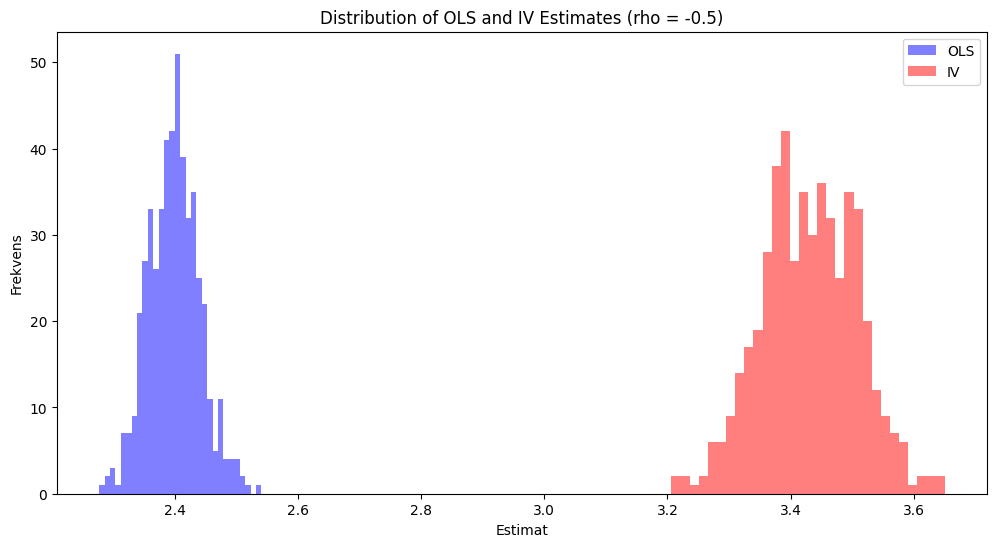

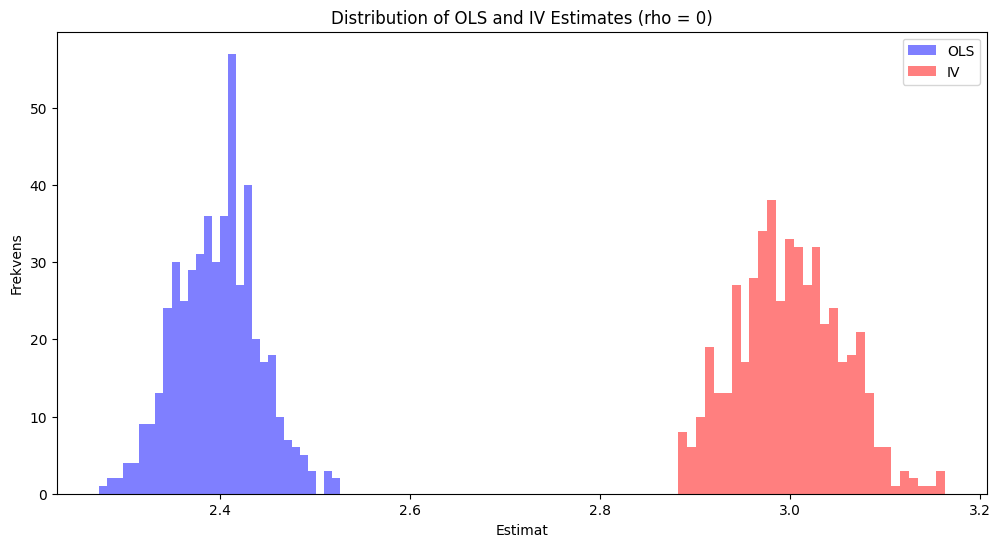

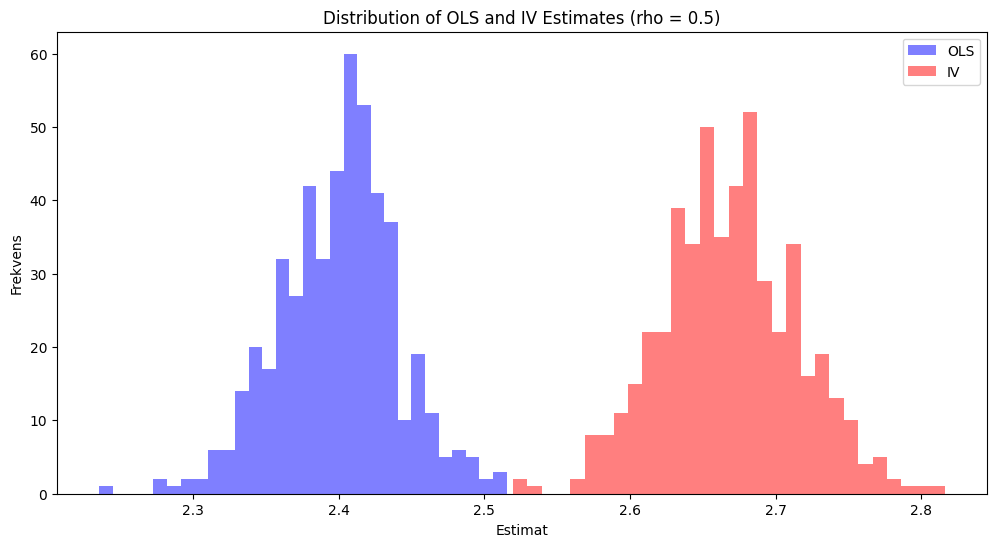

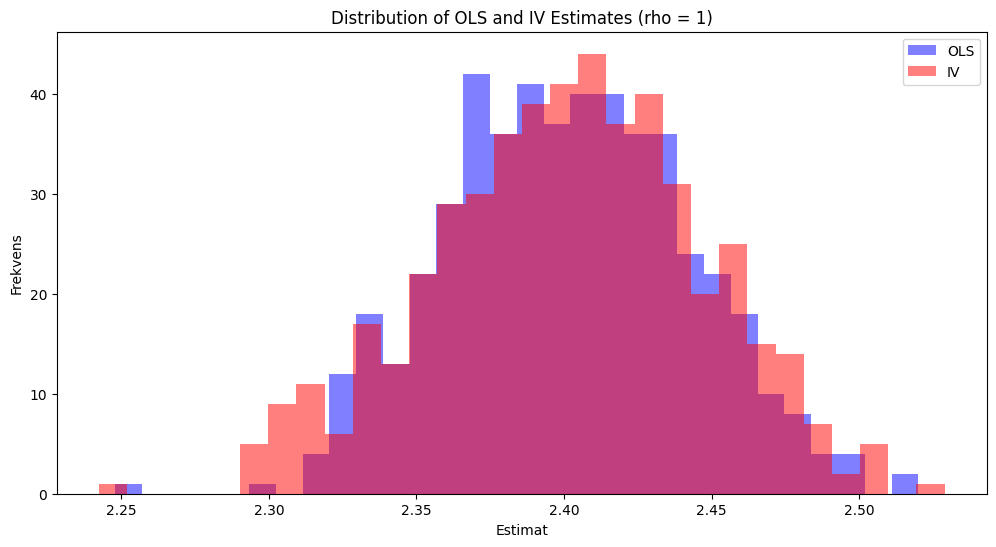

In [8]:
import numpy as np
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
import matplotlib.pyplot as plt

# Antal observationer og replikationer
n = 1000
replications = 500

# Parametre
beta_0 = 4
beta_1 = 3
theta = 1
rho_values = [-0.5, 0, 0.5, 1]  # Forskellige rho-værdier for korrelation mellem målefejl

# Opbevar resultater for OLS og IV estimater
ols_estimates = []
iv_estimates = []

# Vælg en seed for konsistens
np.random.seed(1234)

# Simuler eksperimentet for hver rho-værdi
for rho in rho_values:
    ols_estimates_rho = []
    iv_estimates_rho = []
    
    for _ in range(replications):
        # Simuler x*, u, epsilon, mu
        x_star = np.random.normal(1, np.sqrt(4), n)  # Den sande forklaringsvariabel
        u = np.random.normal(0, 1, n)  # Fejlled i den afhængige variabel
        epsilon = np.random.normal(0, 1, n)  # Målefejl i x
        mu = np.random.normal(0, 1, n)  # Fejl i instrumentvariablen
        
        # Skab de observerede variable x og z
        x = x_star + epsilon  # Den observerede forklaringsvariabel med målefejl
        eta = rho * epsilon + mu  # Målefejl i instrumentet afhængig af epsilon
        z = theta * x_star + eta  # Instrument, som også har målefejl
        
        # Skab y som afhængig variabel
        y = beta_0 + beta_1 * x_star + u  # Den afhængige variabel

        # Estimer OLS (ingen instrumentering)
        X_ols = sm.add_constant(x)  # Tilføj konstantled til OLS
        ols_model = sm.OLS(y, X_ols).fit()
        ols_estimates_rho.append(ols_model.params[1])
        
        # Estimer IV (brug z som instrument for x)
        X_iv = sm.add_constant(np.ones_like(x))  # Tilføj konstantled til IV
        iv_model = IV2SLS(y, X_iv, endog=x, instruments=z).fit()
        iv_estimates_rho.append(iv_model.params.iloc[1])  # Rettet til iloc for at undgå advarsel
    
    # Gem estimater for denne rho-værdi
    ols_estimates.append(ols_estimates_rho)
    iv_estimates.append(iv_estimates_rho)

    # Plot histogrammer for OLS og IV estimater
    plt.figure(figsize=(12, 6))
    plt.hist(ols_estimates_rho, bins=30, alpha=0.5, label="OLS", color="blue")
    plt.hist(iv_estimates_rho, bins=30, alpha=0.5, label="IV", color="red")
    plt.title(f"Distribution of OLS and IV Estimates (rho = {rho})")
    plt.xlabel("Estimat")
    plt.ylabel("Frekvens")
    plt.legend()
    plt.show()